## Basic Web Scraping – What are the most popular Programming Languages?

- **Gabriel Nascimento**
- **github: gabrielnsil**

Importando as Bibliotecas

In [61]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Definindo a página que iremos trabalhar!


https://statisticstimes.com/tech/top-computer-languages.php


In [62]:
url = 'https://statisticstimes.com/tech/top-computer-languages.php'
page = requests.get(url).text

In [63]:
soup = BeautifulSoup(page, 'html5lib')

In [64]:
table_langs = soup.find('table',{'id':'table_id1'}).find('tbody')
table_langs

<tbody>
<tr><td class="data1">1</td><td class="data1"></td><td class="name">Python</td><td class="data1"> 29.93 %</td><td class="data1">-2.2 %</td></tr>
<tr><td class="data1">2</td><td class="data1"></td><td class="name">Java</td><td class="data1"> 17.78 %</td><td class="data1">+1.2 %</td></tr>
<tr><td class="data1">3</td><td class="data1"></td><td class="name">JavaScript</td><td class="data1"> 8.79 %</td><td class="data1">+0.6 %</td></tr>
<tr><td class="data1">4</td><td class="data1"></td><td class="name">C#</td><td class="data1"> 6.73 %</td><td class="data1">+0.2 %</td></tr>
<tr><td class="data1">5</td><td class="data1">↑</td><td class="name">C/C++</td><td class="data1"> 6.45 %</td><td class="data1">+0.7 %</td></tr>
<tr><td class="data1">6</td><td class="data1">↓</td><td class="name">PHP</td><td class="data1"> 5.76 %</td><td class="data1">-0.0 %</td></tr>
<tr><td class="data1">7</td><td class="data1"></td><td class="name">R</td><td class="data1"> 3.92 %</td><td class="data1">-0.1 %</

In [65]:
rows = table_langs.find_all('tr')

In [66]:
for row in rows:
    data = row.find_all('td')
    print(data[0].text)
    print(data[2].text)
    print(data[3].text)
    print('---------')

1
Python
 29.93 %
---------
2
Java
 17.78 %
---------
3
JavaScript
 8.79 %
---------
4
C#
 6.73 %
---------
5
C/C++
 6.45 %
---------
6
PHP
 5.76 %
---------
7
R
 3.92 %
---------
8
Objective-C
 2.26 %
---------
9
TypeScript
 2.11 %
---------
10
Swift
 1.96 %
---------
11
Kotlin
 1.81 %
---------
12
Matlab
 1.48 %
---------
13
Go
 1.29 %
---------
14
Rust
 1.21 %
---------
15
VBA
 1.16 %
---------
16
Ruby
 1.02 %
---------
17
Scala
 0.79 %
---------
18
Ada
 0.77 %
---------
19
Visual Basic
 0.75 %
---------
20
Dart
 0.68 %
---------
21
Lua
 0.58 %
---------
22
Cobol
 0.51 %
---------
23
Groovy
 0.51 %
---------
24
Abap
 0.46 %
---------
25
Perl
 0.45 %
---------
26
Julia
 0.39 %
---------
27
Haskell
 0.24 %
---------
28
Delphi/Pascal
 0.2 %
---------


In [67]:
languages = []
shares = []

for row in rows:
    data = row.find_all('td')
    languages.append(data[2].text)
    shares.append(data[3].text)

In [76]:
df_languages = pd.DataFrame(languages, columns = ['languages'])
df_languages['shares'] = shares

In [77]:
df_languages

,languages,shares
0,Python,29.93 %
1,Java,17.78 %
2,JavaScript,8.79 %
3,C#,6.73 %
4,C/C++,6.45 %
5,PHP,5.76 %
6,R,3.92 %
7,Objective-C,2.26 %
8,TypeScript,2.11 %
9,Swift,1.96 %


In [86]:
df_languages['shares'] = df_languages.shares.str.replace(" %", "")

In [87]:
df_languages

,languages,shares
0,Python,29.93
1,Java,17.78
2,JavaScript,8.79
3,C#,6.73
4,C/C++,6.45
5,PHP,5.76
6,R,3.92
7,Objective-C,2.26
8,TypeScript,2.11
9,Swift,1.96


In [89]:
df_languages['shares'] = pd.to_numeric(df_languages.shares)

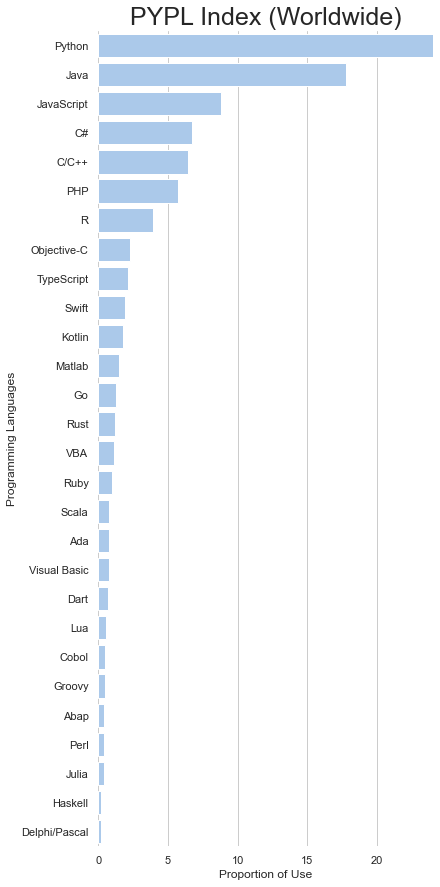

In [98]:
sns.set_theme(style="whitegrid")
f, barplot_langs = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
barplot_langs = sns.barplot(x="shares", y="languages", data=df_languages, label="Total", color="b")
barplot_langs.set(xlim=(0, 24),
       ylabel="Programming Languages",
       xlabel="Proportion of Use")
barplot_langs.axes.set_title('PYPL Index (Worldwide)', fontsize=25)
sns.despine(left=True, bottom=True)
